<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li></ul></li></ul></li><li><span><a href="#Задание-2.-Продолжение" data-toc-modified-id="Задание-2.-Продолжение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 2. Продолжение</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li></ul></li></ul></li><li><span><a href="#Задание-3.-Поделись-с-ближним" data-toc-modified-id="Задание-3.-Поделись-с-ближним-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 3. Поделись с ближним</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li></ul></li></ul></li><li><span><a href="#Задание-4.-Поделись-пакетом" data-toc-modified-id="Задание-4.-Поделись-пакетом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 4. Поделись пакетом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li></ul></li></ul></li></ul></div>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/hometask_SyntheticRubber.ipynb)

In [1]:
##### При работе в Colab
!pip install yfinance requests

In [2]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from tqdm.auto import tqdm
import os

In [3]:
# Для работы с API может потребоваться обходное решение для работы с SSL сертификатом
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании.
* Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании.
* Ваши клиенты предпочитают формульный подход к ценообразованию и вам нужно предложить клиентам формулу цены на синтетический каучук, который может быть альтернативой натуральному каучуку с грейдом SMR 20.
* В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

In [3]:
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
# location - локация клиента
# volumes - закупаемые объемы
# formula - предпочитаемая формула расчета цены - скользящая средняя или среднее значение за месяц

customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'formula':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'formula': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'formula': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'formula': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


In [39]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
year = '2022'
month = '09'
url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
res = requests.get(url)
rj = res.json()
df = pd.json_normalize(rj)
df.head()

""


In [25]:
all_dfs = []
for y in tqdm(['2019','2020','2021','2022']):
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={m}&year={y}"
        res = requests.get(url)
        rj = res.json()
        temp_df = pd.json_normalize(rj)
        all_dfs.append(temp_df)

In [6]:
for y in tqdm(['2022']):
    for m in ['01','02','03','04','05','06','07','08']:
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={m}&year={y}"
        res = requests.get(url)
        rj = res.json()
        temp_df = pd.json_normalize(rj)
        all_dfs.append(temp_df)

In [27]:
df = pd.concat(all_dfs)

In [8]:
df_smr20 = df[df['grade'] == 'SMR 20']
df_smr20 = df_smr20.drop(['grade','masa','rm','tone'], axis=1)
df_smr20['date'] = pd.to_datetime(df_smr20['date'], format='%Y-%m-%d')
df_smr20 = df_smr20.set_index('date')
df_smr20['us'] = pd.to_numeric(df_smr20['us'])
mean_df_smr20 = df_smr20.resample('M').mean()
mean_df_smr20.columns = ['SMR_20_US']

In [9]:
df_dict = {}
for ticker in tqdm(['USDRUB=X', 'EURUSD=X', 'EURRUB=X']):
    df1 = yf.download(ticker)
    df1 = df1.Close.copy()
    df1 = df1.resample('M').mean()
    df_dict[ticker] = df1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



In [10]:
main_df = pd.concat(df_dict.values(), axis=1)
main_df.columns = ['USDRUB', 'EURUSD', 'EURRUB']
main_df = main_df.loc['2019-01-31':'2022-08-31'].copy()

In [11]:
main_df = mean_df_smr20.add(main_df, fill_value=0)

In [12]:
main_df.head()

,EURRUB,EURUSD,SMR_20_US,USDRUB
date,,,,
2019-01-31,76.434270,1.142533,135.333333,66.883992
2019-02-28,74.735620,1.135397,139.126471,65.778695
2019-03-31,73.674074,1.130985,147.559524,65.115486
2019-04-30,72.561023,1.123492,151.561905,64.569977
2019-05-31,72.577653,1.118911,152.315000,64.876098


In [13]:
main_df['SMR20_PRICE_EUR'] = main_df.SMR_20_US * (1/main_df.EURUSD) + 400
main_df['SMR20_PRICE_USD'] = main_df.SMR_20_US + 400
main_df['SMR20_PRICE_EUR_EU'] = main_df['SMR20_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
main_df['SMR20_PRICE_USD_CN'] = main_df['SMR20_PRICE_USD'] + CN_LOGISTIC_COST_USD
main_df['SMR20_PRICE_EUR_EU_MA'] = main_df.SMR20_PRICE_EUR_EU.rolling(window=3).mean()

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

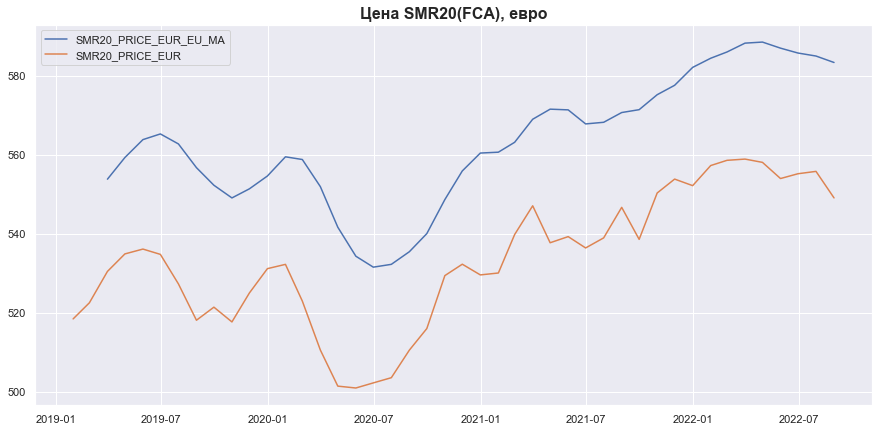

In [15]:
# График с базовой ценой(на заводе) в евро
plt.title('Цена SMR20(FCA), евро', fontsize=16, fontweight='bold')
plt.plot(main_df['SMR20_PRICE_EUR_EU_MA'], label='SMR20_PRICE_EUR_EU_MA')
plt.plot(main_df['SMR20_PRICE_EUR'], label='SMR20_PRICE_EUR')
plt.legend()
plt.show()

In [16]:
discounts = {100: 0.01, 300: 0.05, 301: 0.1}

In [20]:
customers

{'Monty': {'location': 'EU', 'volumes': 200, 'formula': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'formula': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'formula': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'formula': 'monthly'}}

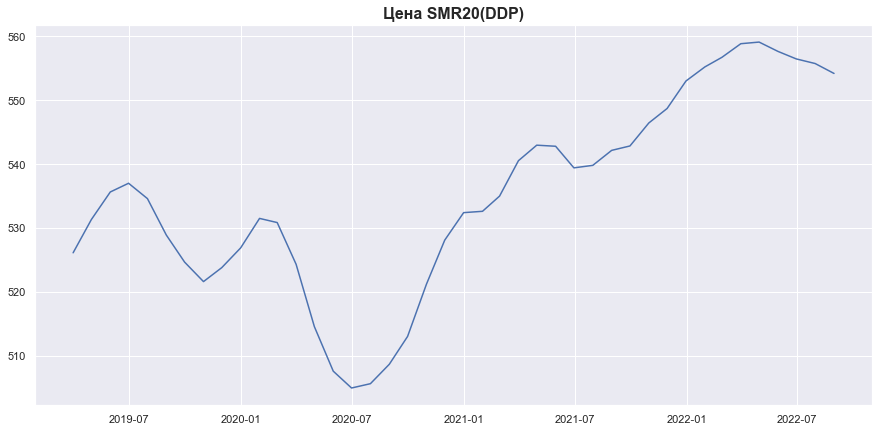

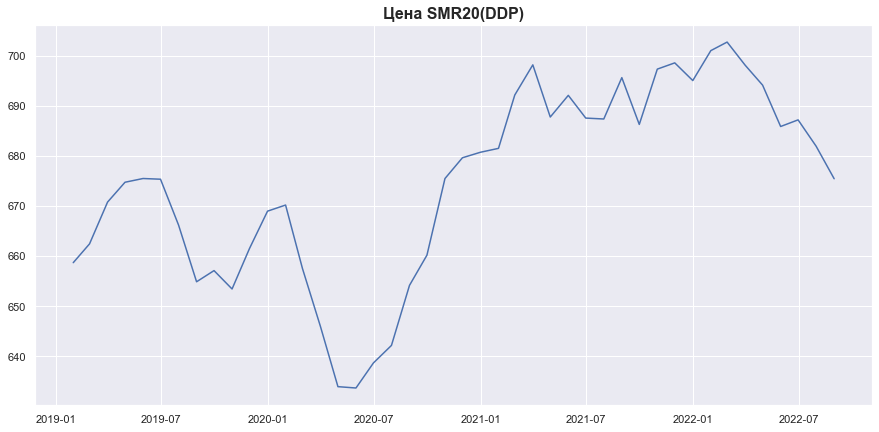

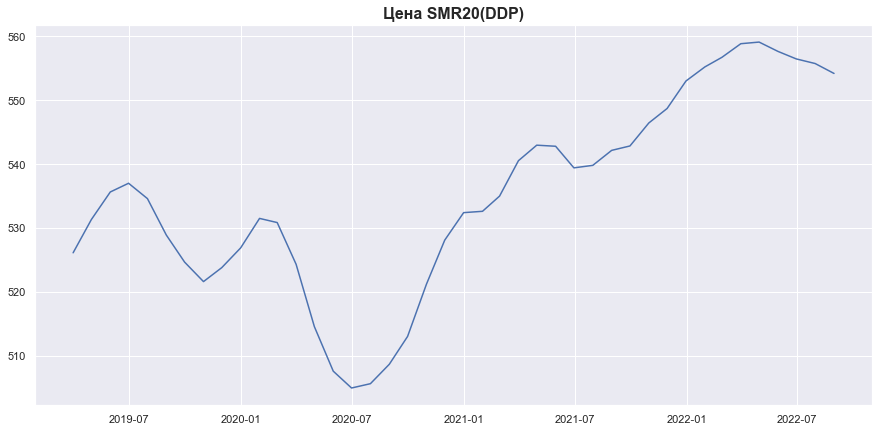

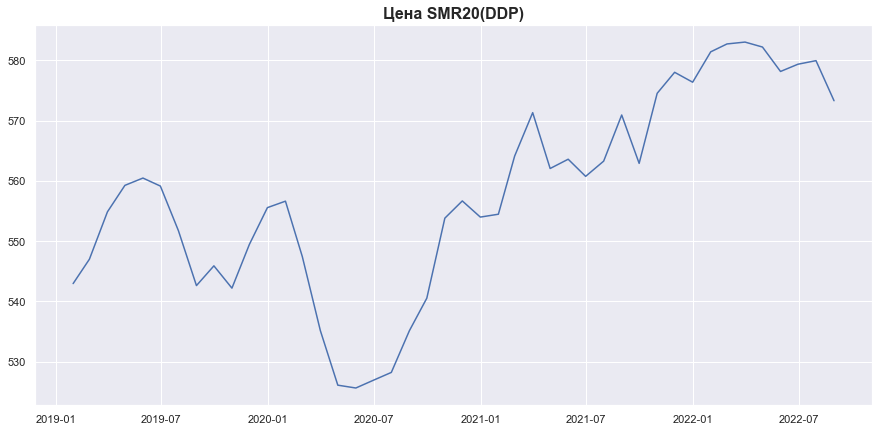

In [21]:
with pd.ExcelWriter('price_proposals.xlsx', engine = 'xlsxwriter') as writer:
    for client, v in customers.items():

        disc = 0.0
        if v.get('location') == "EU":
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            if v.get('formula') == 'monthly':
                client_price = main_df['SMR20_PRICE_EUR_EU'] * (1-disc)
            elif v.get('formula') == 'moving_average':
                client_price = main_df['SMR20_PRICE_EUR_EU_MA'] * (1-disc)

        elif v.get('location') == 'CN':
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            client_price = main_df['SMR20_PRICE_USD_CN'] * (1-disc)

        # print(client, v, disc)
        client_price.to_excel(writer, sheet_name=client)
        # Добавляем график с ценой
        plot_path = f'{client}_SMR20.png'
        plt.title('Цена SMR20(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        # worksheet = writer.sheets[client]
        # worksheet.insert_image('C2',plot_path)

    for k,v in customers.items():
        worksheet = writer.sheets[k]
        worksheet.insert_image('C2',f"{k}_SMR20.png")

for k,v in customers.items():
    if os.path.exists(f"{k}_SMR20.png"):
        os.remove(f"{k}_SMR20.png")

In [22]:
# Создаем директорию для ценовых предложений клиентам
price_proposals_path = 'client_wbp_price_proposals'
if not os.path.exists(price_proposals_path):
    os.mkdir(price_proposals_path)

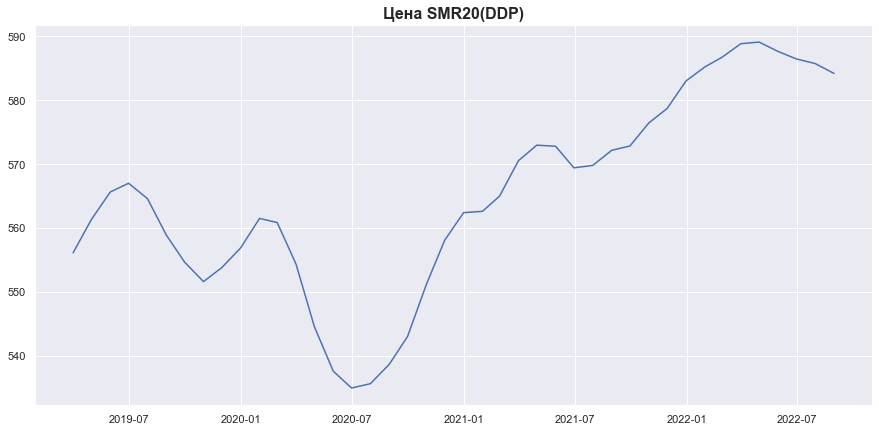

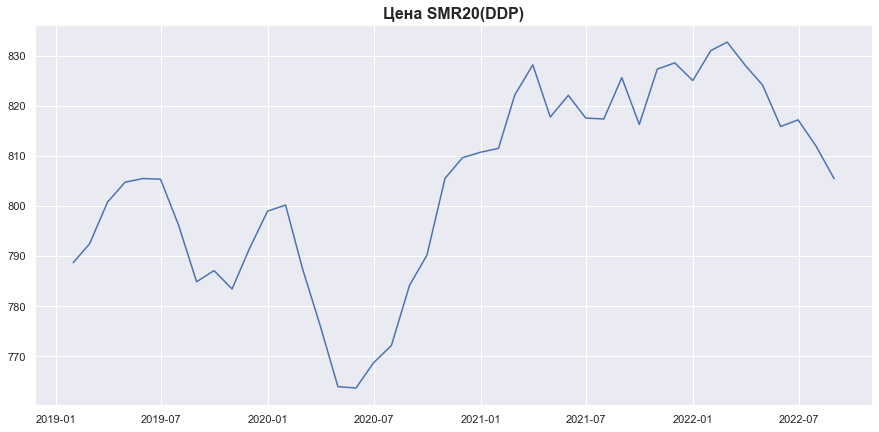

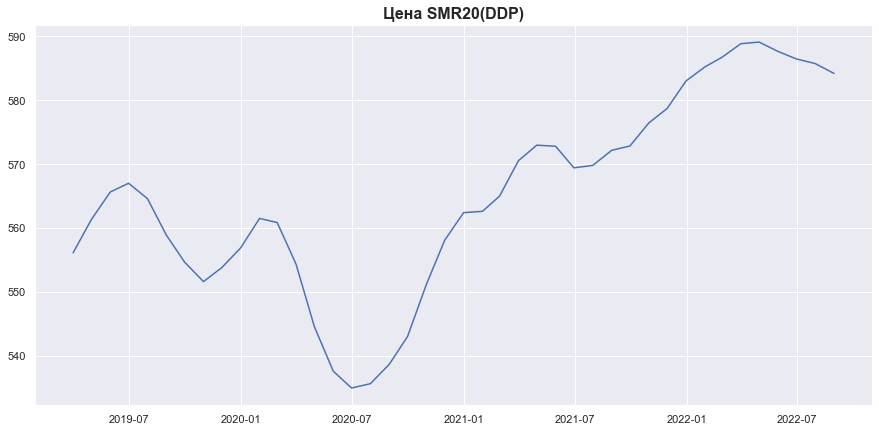

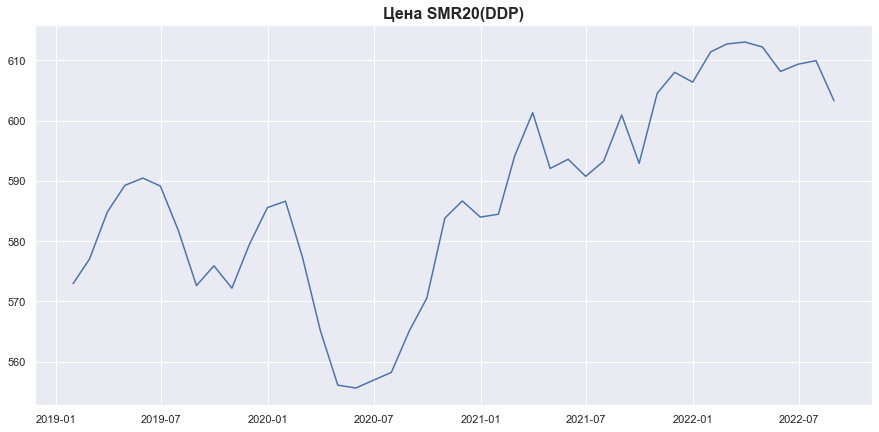

In [24]:
# Создаем отдельный файл для каждого из клиентов
for client, v in customers.items():
    client_proposal_file_path = os.path.join(price_proposals_path, f'{client}_SMR20_price_proposal.xlsx')
    location = v.get('location')
    disc = 0.0
    if v.get('location') == "EU":
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        if v.get('formula') == 'monthly':
            client_price = main_df['SMR20_PRICE_EUR_EU'] * (1-disc) + EU_LOGISTIC_COST_EUR
        elif v.get('formula') == 'moving_average':
            client_price = main_df['SMR20_PRICE_EUR_EU_MA'] * (1-disc) + EU_LOGISTIC_COST_EUR

    elif v.get('location') == 'CN':
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        client_price = main_df['SMR20_PRICE_USD_CN'] * (1-disc) + CN_LOGISTIC_COST_USD
    with pd.ExcelWriter(client_proposal_file_path, engine='xlsxwriter') as writer:
        client_price.to_excel(writer, sheet_name='price_proposal')
        # Добавляем график с ценой
        plot_path = f'{client}_SMR20.png'
        plt.title('Цена SMR20(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        worksheet = writer.sheets['price_proposal']
        worksheet.insert_image('C2',plot_path)

for k,v in customers.items():
    if os.path.exists(f"{k}_SMR20.png"):
        os.remove(f"{k}_SMR20.png")

# Задание 2. Продолжение

Клиенты согласились на ваше предложение.
### Что нужно сделать?
Вам нужно написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно.



* В результате должен быть скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



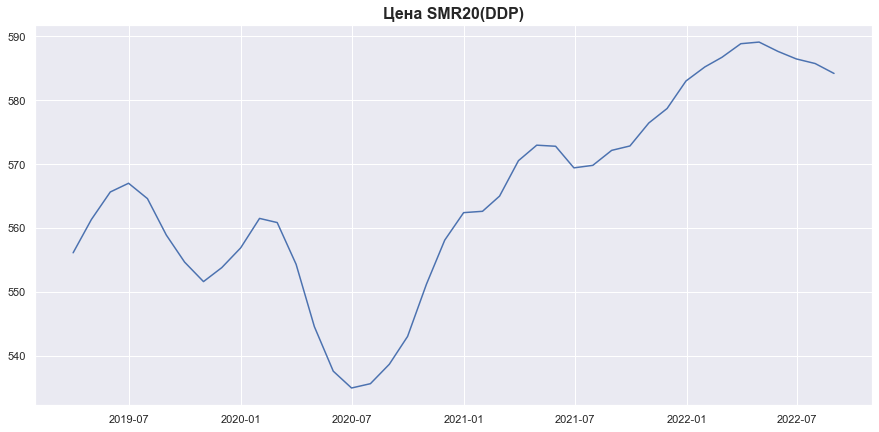

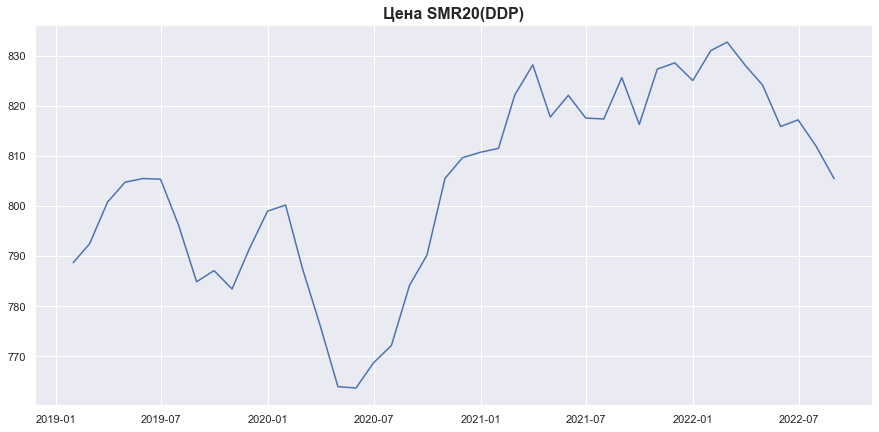

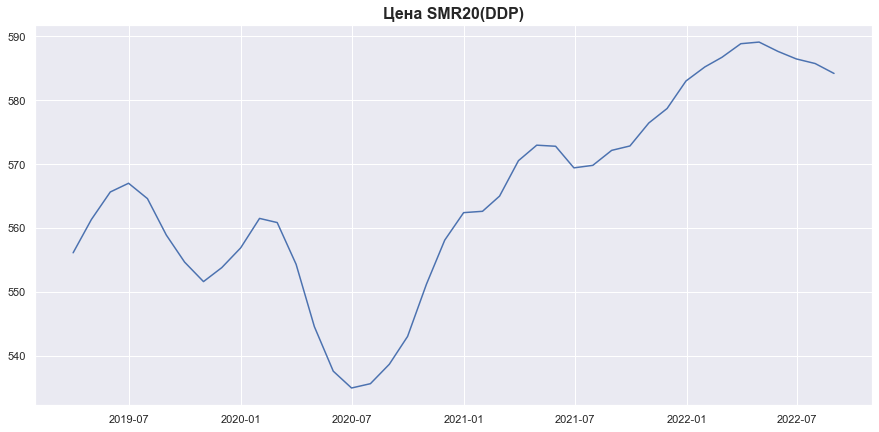

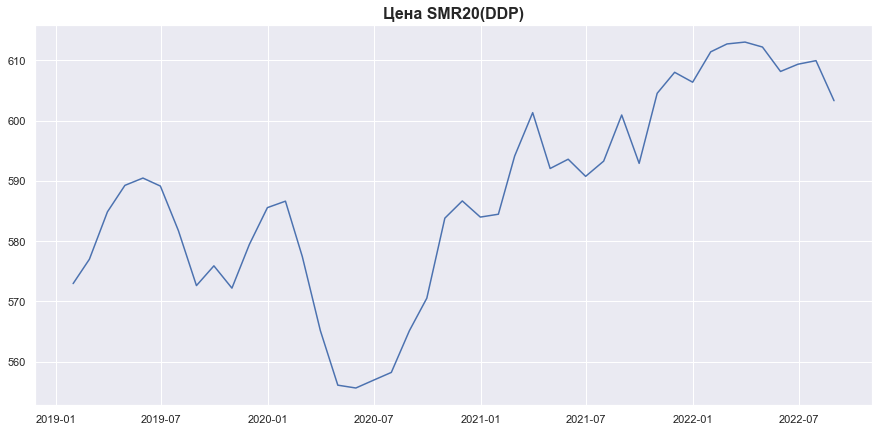

In [30]:
# импортируем необходимые библиотеки
!pip install yfinance requests
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from tqdm.auto import tqdm
import os
from pylab import rcParams
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
# location - локация клиента
# volumes - закупаемые объемы
# formula - предпочитаемая формула расчета цены - скользящая средняя или среднее значение за месяц

customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'formula':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'formula': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'formula': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'formula': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%
# получаем данные с биржи по каучуку
all_dfs = []
for y in tqdm(['2019','2020','2021','2022']):
    for m in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={m}&year={y}"
        res = requests.get(url)
        rj = res.json()
        temp_df = pd.json_normalize(rj)
        all_dfs.append(temp_df)
# создаем датафрейм
df = pd.concat(all_dfs)
df_smr20 = df[df['grade'] == 'SMR 20']
df_smr20 = df_smr20.drop(['grade','masa','rm','tone'], axis=1)
df_smr20['date'] = pd.to_datetime(df_smr20['date'], format='%Y-%m-%d')
df_smr20 = df_smr20.set_index('date')
df_smr20['us'] = pd.to_numeric(df_smr20['us'])
mean_df_smr20 = df_smr20.resample('M').mean()
mean_df_smr20.columns = ['SMR_20_US']
# получаем данные по курсам валют
df_dict = {}
for ticker in tqdm(['USDRUB=X', 'EURUSD=X', 'EURRUB=X']):
    df1 = yf.download(ticker)
    df1 = df1.Close.copy()
    df1 = df1.resample('M').mean()
    df_dict[ticker] = df1
main_df = pd.concat(df_dict.values(), axis=1)
main_df.columns = ['USDRUB', 'EURUSD', 'EURRUB']
main_df = main_df.loc['2019-01-31':'2022-08-31'].copy()
# объединяем данные с биржи валют и каучука
main_df = mean_df_smr20.add(main_df, fill_value=0)
# рассчитываем цены
main_df['SMR20_PRICE_EUR'] = main_df.SMR_20_US * (1/main_df.EURUSD) + 400
main_df['SMR20_PRICE_USD'] = main_df.SMR_20_US + 400
main_df['SMR20_PRICE_EUR_EU'] = main_df['SMR20_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
main_df['SMR20_PRICE_USD_CN'] = main_df['SMR20_PRICE_USD'] + CN_LOGISTIC_COST_USD
main_df['SMR20_PRICE_EUR_EU_MA'] = main_df.SMR20_PRICE_EUR_EU.rolling(window=3).mean()
rcParams['figure.figsize'] = 15,7
# скидки
discounts = {100: 0.01, 300: 0.05, 301: 0.1}
# Создаем директорию для ценовых предложений клиентам
price_proposals_path = 'client_wbp_price_proposals'
if not os.path.exists(price_proposals_path):
    os.mkdir(price_proposals_path)
# Создаем отдельный файл для каждого из клиентов с расчетом
for client, v in customers.items():
    client_proposal_file_path = os.path.join(price_proposals_path, f'{client}_SMR20_price_proposal.xlsx')
    location = v.get('location')
    disc = 0.0
    if v.get('location') == "EU":
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        if v.get('formula') == 'monthly':
            client_price = main_df['SMR20_PRICE_EUR_EU'] * (1-disc) + EU_LOGISTIC_COST_EUR
        elif v.get('formula') == 'moving_average':
            client_price = main_df['SMR20_PRICE_EUR_EU_MA'] * (1-disc) + EU_LOGISTIC_COST_EUR

    elif v.get('location') == 'CN':
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        client_price = main_df['SMR20_PRICE_USD_CN'] * (1-disc) + CN_LOGISTIC_COST_USD
    with pd.ExcelWriter(client_proposal_file_path, engine='xlsxwriter') as writer:
        client_price.to_excel(writer, sheet_name='price_proposal')
        # Добавляем график с ценой
        plot_path = f'{client}_SMR20.png'
        plt.title('Цена SMR20(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        worksheet = writer.sheets['price_proposal']
        worksheet.insert_image('C2',plot_path)

for k,v in customers.items():
    if os.path.exists(f"{k}_SMR20.png"):
        os.remove(f"{k}_SMR20.png")


# Задание 3. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

### Что нужно сделать?
* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ
* Помните о PEP8

In [47]:
import price_SMR20_calculation_mod

In [52]:
import importlib

In [53]:
importlib.reload(price_SMR20_calculation_mod)

<module 'price_SMR20_calculation_mod' from 'C:\\Users\\alexz\\Documents\\DAWH\\Data\\python-for-data-analytics\\Lesson3\\hometask\\price_SMR20_calculation_mod.py'>

Подгружаем котировки и курсы



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Рассчитываем цены
Готовим отдельный файл для клиентов
Monty готов


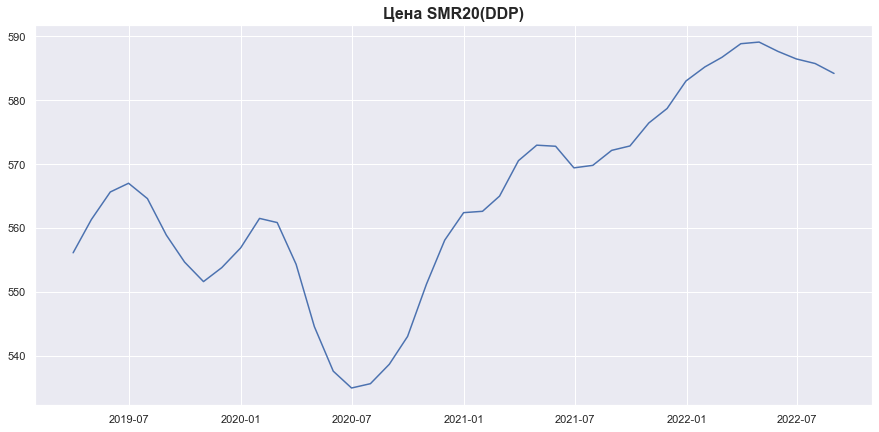

Triangle готов


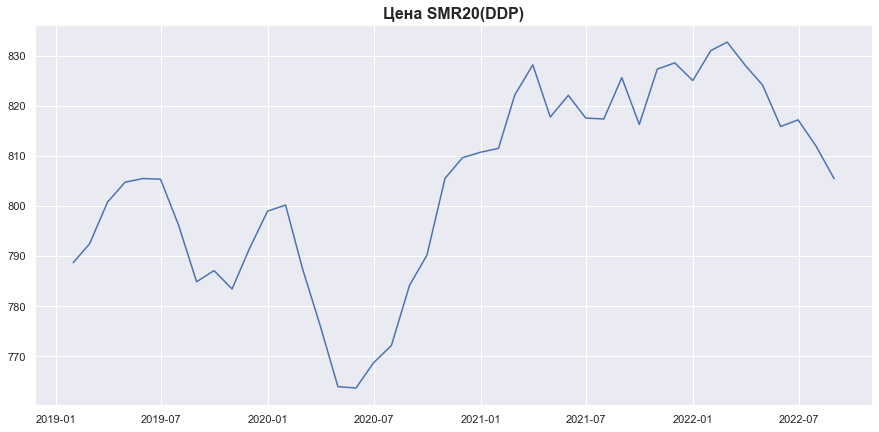

Stone готов


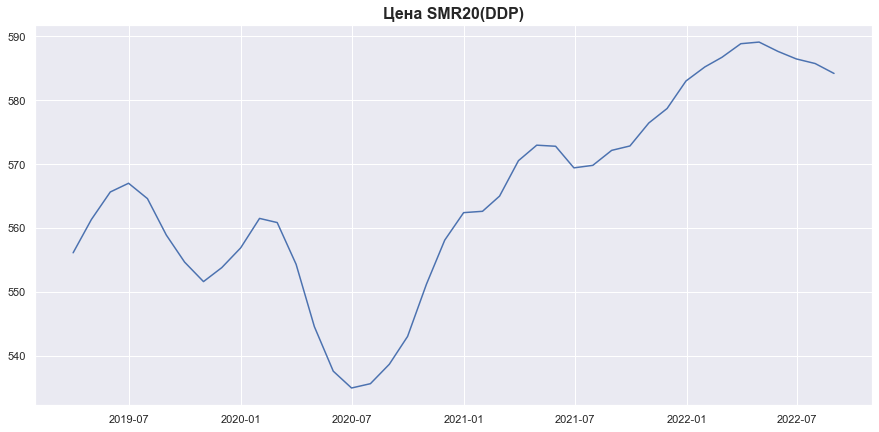

Poly готов


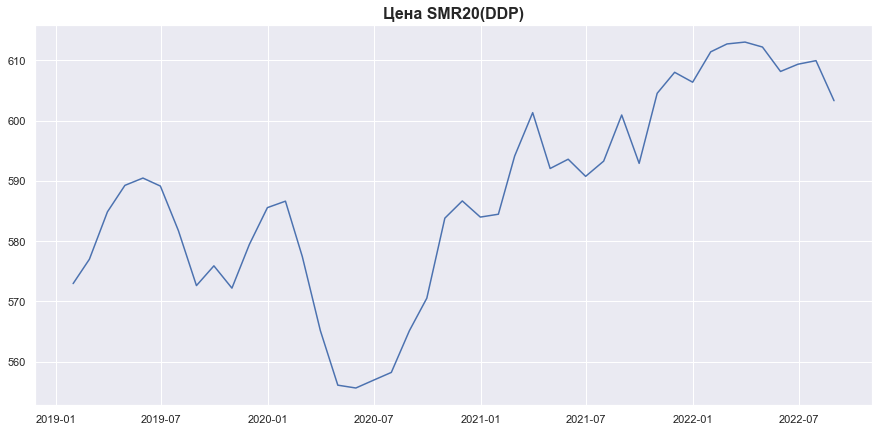

Удаляем ненужные файлы
Работа завершена!


In [54]:
price_SMR20_calculation_mod.calculate_prices()

# Задание 4. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

### Что нужно сделать?
* Создайте отдельный пакет, который можно устанавливать с помощью pip
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в свой репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage

In [2]:
pwd


'C:\\Users\\alexz\\Documents\\DAWH\\Data\\python-for-data-analytics\\Lesson3\\hometask'

In [3]:
cd another_package_folder

C:\Users\alexz\Documents\DAWH\Data\python-for-data-analytics\Lesson3\hometask\another_package_folder


In [4]:
ls

 Том в устройстве C не имеет метки.
 Серийный номер тома: 3416-00FE

 Содержимое папки C:\Users\alexz\Documents\DAWH\Data\python-for-data-analytics\Lesson3\hometask\another_package_folder

04.08.2022  23:33    <DIR>          .
04.08.2022  23:33    <DIR>          ..
04.08.2022  23:31    <DIR>          price_SMR20_calculation_package
04.08.2022  23:33               469 setup.py
               1 файлов            469 байт
               3 папок  72 518 868 992 байт свободно


In [5]:
pip install .

Processing c:\users\alexz\documents\dawh\data\python-for-data-analytics\lesson3\hometask\another_package_folder
  Created wheel for price-SMR20-calculation-package: filename=price_SMR20_calculation_package-0.0.1-py3-none-any.whl size=3928 sha256=85c6e164fcead4f90063f4c005f57d65f1b35531981e823ddf576f1ce6707d47
  Stored in directory: C:\Users\alexz\AppData\Local\Temp\pip-ephem-wheel-cache-y4ocl0jm\wheels\a4\96\e1\0e1feb3fafb15fcde135e10772503f499125dc23bb17a00dbb
Successfully built price-SMR20-calculation-package
Note: you may need to restart the kernel to use updated packages.


In [12]:
from price_SMR20_calculation_package.price_SMR20_calculation_pac import calculate_prices

hello
Подгружаем котировки и курсы


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Рассчитываем цены
Готовим отдельный файл для клиентов
Monty готов


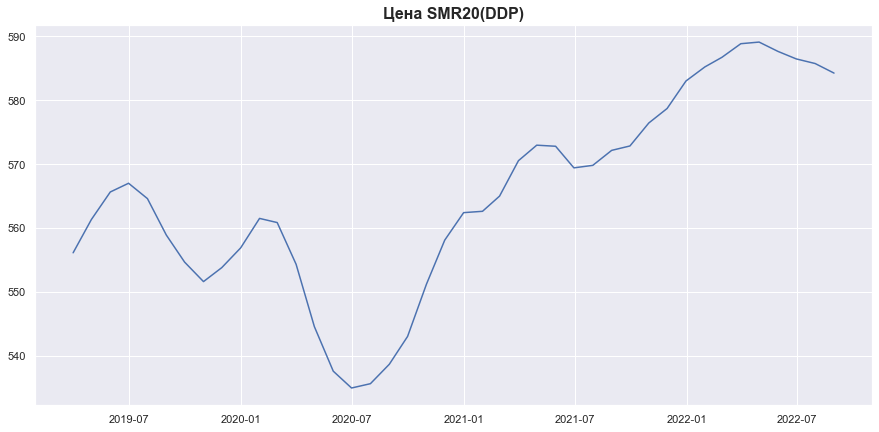

Triangle готов


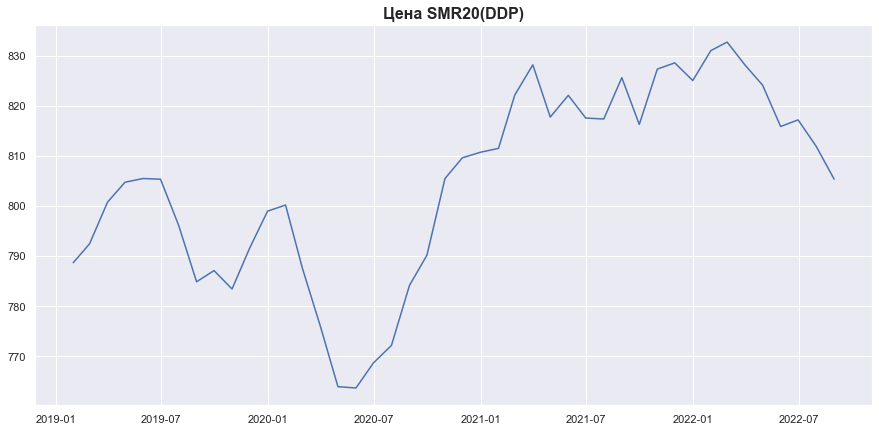

Stone готов


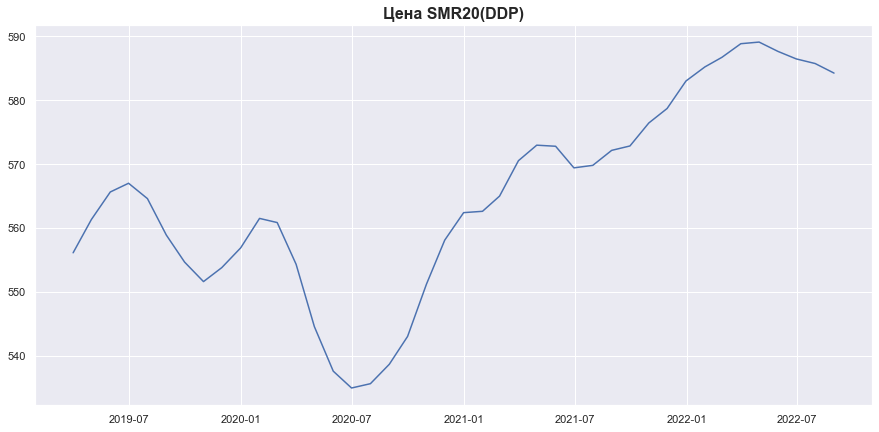

Poly готов


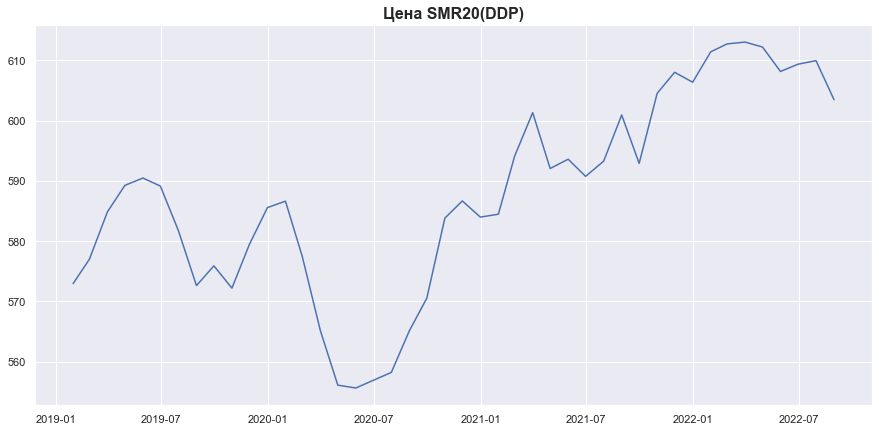

Удаляем ненужные файлы
Работа завершена!


In [13]:
calculate_prices()